<a href="https://colab.research.google.com/github/freddysundowner/Flutter/blob/develop/FredModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q opendatasets

In [11]:
import opendatasets as od
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import keras
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions

In [5]:
od.download('https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset') # insert ypu kaggle  username and key

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [8]:
list_crasses = os.listdir("/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train")
len(list_crasses)

38

In [10]:
train_datagen = ImageDataGenerator(zoom_range=0.5, shear_range=0.3,horizontal_flip= True, preprocessing_function=proprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=proprocess_input)

In [12]:
train = train_datagen.flow_from_directory(
    directory= "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
    target_size = (256,256),
    batch_size = 32)
val = val_datagen.flow_from_directory(
    directory= "/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
    target_size = (256,256),
    batch_size = 32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [13]:
t_img, label = train.next()

In [14]:
t_img.shape

(32, 256, 256, 3)

In [26]:
def plotImage(img_arr, label):
  for im, l in zip(img_arr, label):
    plt.figure(figsize=(5,5))
    plt.show()

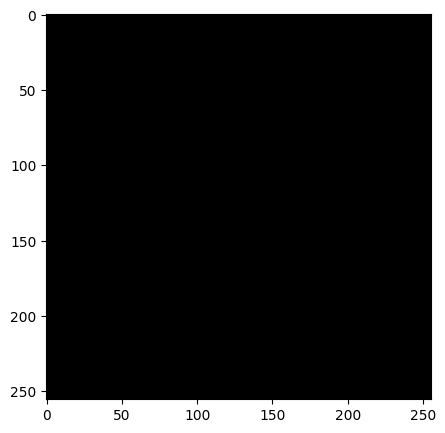

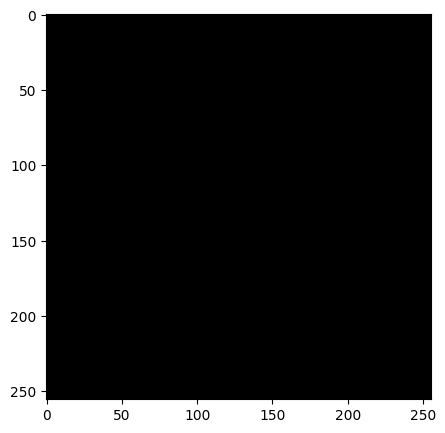

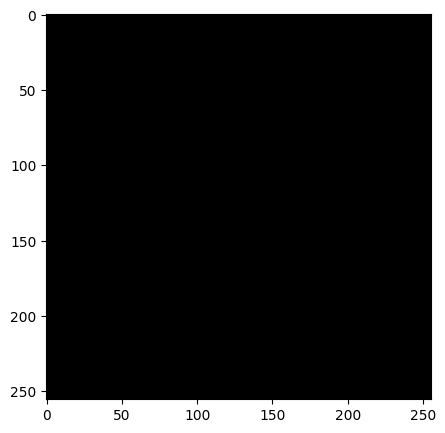

In [27]:
plotImage(t_img[:3], label[:3])

In [28]:
from keras.layers import Dense, Flatten
from keras.models import Model
import keras

In [30]:
base_model = VGG19(input_shape=(256,256,3), include_top= False)

80134624/80134624 [==============================] - 3s 0us/step


In [31]:
for layer in base_model.layers:
  layer.trainable = False

In [33]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [35]:
x = Flatten()(base_model.output)
x = Dense(units = 38, activation = 'softmax')(x)
model = Model(base_model.input, x)

In [36]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(
    monitor = 'val_accuracy',
    min_delta = 0.01,
    patience = 3,
    verbose = 1
)

mc = ModelCheckpoint(
        filepath = "best_model.h5",
        monitor = "val_accuracy",
        min_delta = 0.01,
        patience = 3,
        verbose = 1,
        save_best_only = True
)
cb = [es,mc]

In [40]:
model.compile(
    optimizer="adam",
    loss = keras.losses.categorical_crossentropy,
    metrics = ['accuracy']
    )

In [ ]:
his = model.fit_generator(train,
                          steps_per_epoch =16,
                          epochs = 50,
                          verbose = 1,
                          callbacks = cb,
                          validation_data = val,
                          validation_steps = 16
)

<ipython-input-41-e589ba838c9a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train,


Epoch 1/50
 6/16 [==========>...................] - ETA: 4:51 - loss: 6.3217 - accuracy: 0.0573